In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image

## Zadanie 1

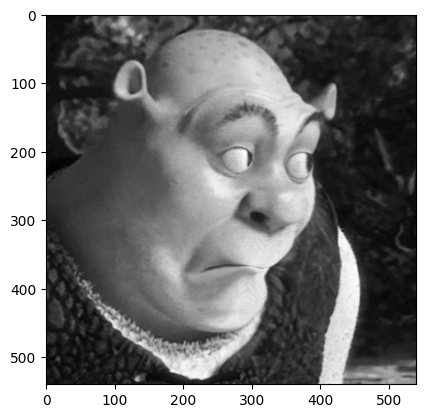

In [2]:
shrek_image = Image.open("shrek.bmp").convert("L")
shrek_array = np.asarray(shrek_image)

plt.imshow(shrek_image, cmap="gray")

In [3]:
def convolve(image, image_filter):
    y_res, x_res = image.shape
    
    convolved_image = np.zeros((y_res, x_res))
    
    for y_index in range(1, y_res - 1):
        for x_index in range(1, x_res - 1):
            convolved_image[y_index - 1, x_index - 1] = np.sum(image[y_index - 1 : y_index + 2, x_index - 1 : x_index + 2] * image_filter)
            
    return convolved_image

### Filtr pionowy:

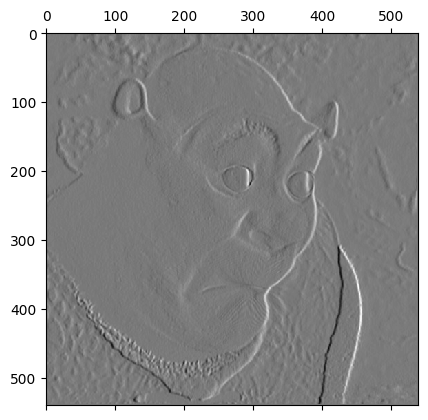

In [4]:
vertical_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

shrek_vertical = convolve(shrek_array, vertical_filter)

plt.matshow(shrek_vertical, cmap="gray")

### Filtr poziomy:

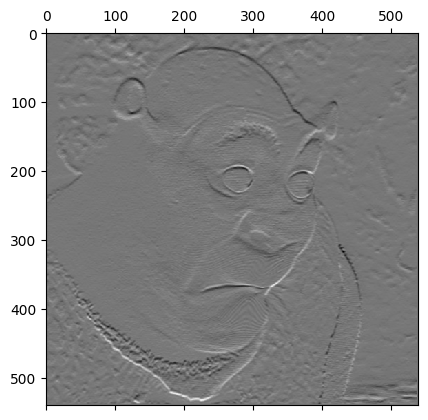

In [5]:
horizontal_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

shrek_horizontal = convolve(shrek_array, horizontal_filter)

plt.matshow(shrek_horizontal, cmap="gray")

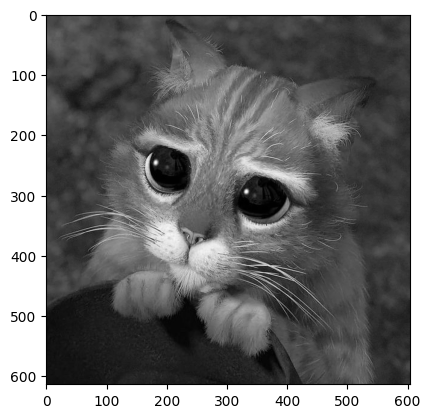

In [6]:
cat_image = Image.open("cat.bmp").convert("L")
cat_array = np.asarray(cat_image)

plt.imshow(cat_array, cmap="gray")

### Filtr pionowy:

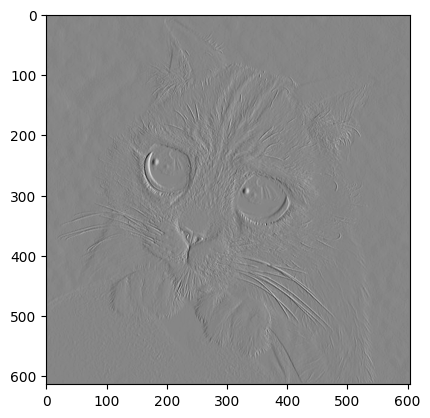

In [7]:
cat_vertical = convolve(cat_array, vertical_filter)
plt.imshow(cat_vertical, cmap="gray")

### Filtr poziomy:

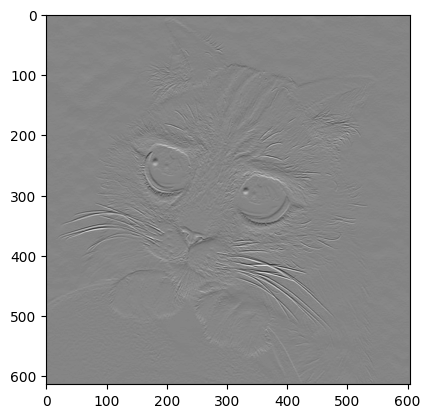

In [8]:
cat_horizontal = convolve(cat_array, horizontal_filter)
plt.imshow(cat_horizontal, cmap="gray")

## Zadanie 2

Liczba potrzebnych filtrów: $k_c * n$ (liczba kanałów wejściowych * liczba kanałów wyjściowych). \
Każdy filtr ma $k_W * k_H$ paramterów (szerokość filtra * wysokość filtra). \
Potrzebne są jeszcze parametry bias, jest ich tyle ile wynosi liczba kanałów wyjściowych. \
W sumie $P = k_c * n * k_W * k_H + n$

## Zadanie 3

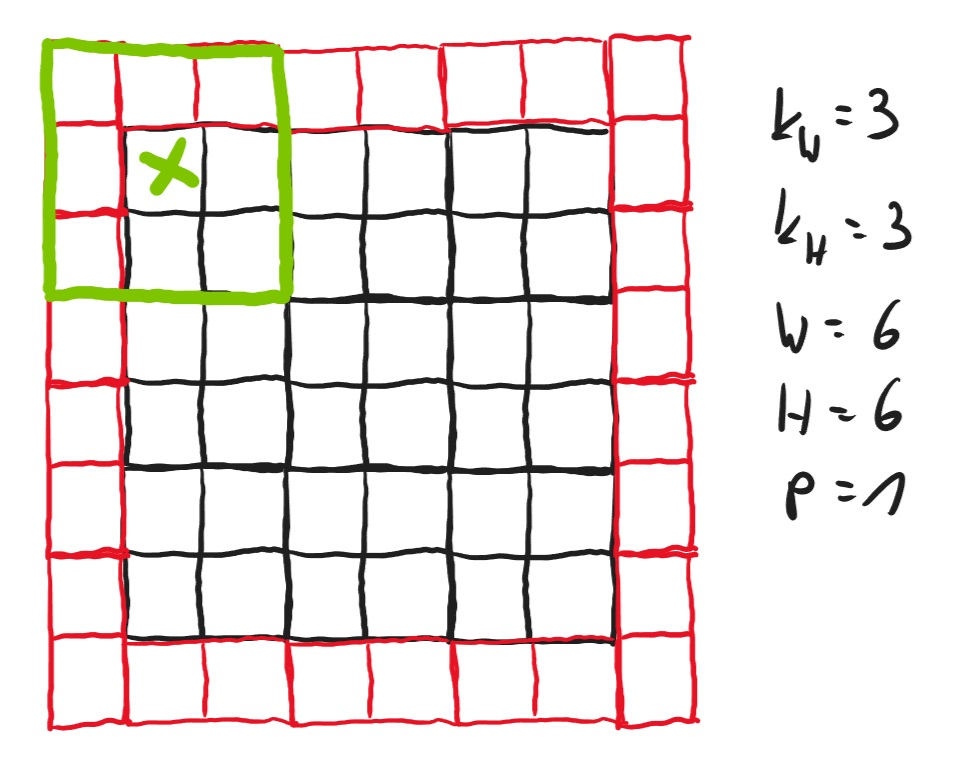

In [9]:
display.Image("diagram.jpg")

### Uzasadnienie słowne:
Weźmy pod uwagę tylko wysokość. Aby dostać wysokość wynikowej mapy cech należy od wysokość mapy wejściowej odjąć wysokość kernela i dodać 1 \
(góra i dół kernela "obcina" mapę wejściową, ale środek kernela zostaje "w mapie"). Jeśli stosujemy padding, należy go dodać x2, bo jest dodawany \
na górze i na dole mapy wejściowej. Skok skaluje mapę wyjściową jak $1/s$ (należy wykonać odpowiednie dzielenie zwracając uwagę na obcięcie do \
liczby całkowitej). Podobnie jest dla szerokości.

### Uzasadnienie przez przykład:
Powyższy rysunek przedstawia: na czarno - wejściową mapę cech, na czerwono - padding, na zielono - kernel. Padding został dobrany tak, \
aby wyjściowa mapa cech była tego samego wymiaru co wejściowa mapa cech. Prześledźmy pierwszą część zadanego wyrażenia, czyli: \
$M_H=[\frac{H-k_H+2p}{s}]+1$, jest to wyrażenie na wysokość wynikowej mapy cech. Podstawiając parametry z powyższego rysunku dostaniemy \
$M_H=6$ (przy założeniu, że $s=1$), takiej wartości należało się spodziewać (wysokość miała się nie zmienić). Warto zwrócić uwagę na nawiasy \
kwadratowe w wyrażeniu, jest to obcięcie do wartości całkowitej - przy kroku $s>1$ może się zdarzyć, że wyrażenie nie będzie liczbą całkowitą. \
Aby temu zapobiec stosuje się obcięcie. \
\
Analogicznie wygląda to w przypadku szerokość: $M_W=[\frac{W-k_W+2p}{s}]+1$ \
\
Zatem rozmiar wynikowej mapy cech to: $[\frac{H-k_H+2p}{s}]+1 \times [\frac{W-k_W+2p}{s}]+1$

## Zadanie 4

### Skalowanie Lorda Farquaada

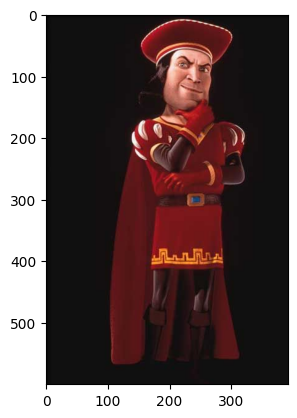

In [10]:
farquaad_image = Image.open("farquaad.bmp")
plt.imshow(farquaad_image)

In [11]:
def scale(image, size):
    x_res_orig, y_res_orig = image.size
    y_res, x_res = size
    
    scaled_image_red = np.zeros((y_res, x_res))
    scaled_image_green = np.zeros((y_res, x_res))
    scaled_image_blue = np.zeros((y_res, x_res))
    
    image_red, image_green, image_blue = image.split()
    image_red = np.asarray(image_red)
    image_green = np.asarray(image_green)
    image_blue = np.asarray(image_blue)

    for y_index in range(y_res):
        for x_index in range(x_res):
            x_target = int((x_index / x_res) * x_res_orig)
            y_target = int((y_index / y_res) * y_res_orig)
            
            scaled_image_red[y_index, x_index] = image_red[y_target, x_target]
            scaled_image_green[y_index, x_index] = image_green[y_target, x_target]
            scaled_image_blue[y_index, x_index] = image_blue[y_target, x_target]

    return Image.merge("RGB", (Image.fromarray(np.uint8(scaled_image_red)), Image.fromarray(np.uint8(scaled_image_green)), Image.fromarray(np.uint8(scaled_image_blue))))

### Przeskalowany Farquaad:

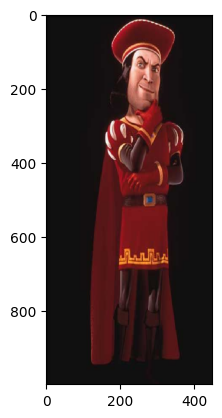

In [12]:
farquaad_scaled = scale(farquaad_image, (1000, 450))
plt.imshow(farquaad_scaled)